In [1]:
################ Data Analysis & Calculation ##############3
import numpy as np 
import pandas as pd 

############ Data Visualization ##############
import matplotlib.pyplot as plt
%matplotlib inline

############### NLP & Search pattern ##################

import re #library in Python provides regular expression matching operations. Regular expressions are powerful tools for pattern matching within strings. 
import nltk 

############### Ignore Warning #############3
import warnings
warnings.filterwarnings('ignore')

In [2]:
cricket = pd.read_csv(r"D:\comments Harsha Bhogle Previews India vs New Zealand Champions Trophy Final 9asUKb1P-r8.csv")

cricket.shape

(435, 11)

In [3]:
data = pd.DataFrame(cricket.simpleText)
data

,simpleText
0,Thats the difference between kohli & everybody...
1,Ohooo..in BGT tooVirat performance was unnotic...
2,​ @swapnajapatil3176 Bro chose violence 😂😂 🤣
3,Agreed 100%
4,I couldn't agree more
...,...
430,Goodluck team India for champion trophy finals ❤
431,"Yes TRUE, kiwis are calmer than us"
432,If India bats first... Rohit will be the key w...
433,They should've also conducted matches in abu d...


In [4]:
data.iloc[2,0]

'\u200b\xa0@swapnajapatil3176\xa0Bro chose violence 😂😂 🤣'

## Converted to Lower

In [5]:
data.simpleText = data.simpleText.str.lower()

In [6]:
data

,simpleText
0,thats the difference between kohli & everybody...
1,ohooo..in bgt toovirat performance was unnotic...
2,​ @swapnajapatil3176 bro chose violence 😂😂 🤣
3,agreed 100%
4,i couldn't agree more
...,...
430,goodluck team india for champion trophy finals ❤
431,"yes true, kiwis are calmer than us"
432,if india bats first... rohit will be the key w...
433,they should've also conducted matches in abu d...


## Removing Url

In [7]:
data['simpleText'] = data['simpleText'].replace(r'http\S+|www\S+', '',regex=True)

In [8]:
data.iloc[2,0]

'\u200b\xa0@swapnajapatil3176\xa0bro chose violence 😂😂 🤣'

In [9]:
data.iloc[10,0]

"\xa0@honeygrewal2381\xa0laugh untill u r satisfied ,u r kohli fan so u can only looking for his form and don't talking about others performances !!!!     why always kohli fans like this ???"

## Remove punctuation

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punctuation(abc):
    text_nopunt = "".join([
        c for c in abc if c not in string.punctuation 
    ])
    return text_nopunt

In [12]:
data.iloc[10,0]

"\xa0@honeygrewal2381\xa0laugh untill u r satisfied ,u r kohli fan so u can only looking for his form and don't talking about others performances !!!!     why always kohli fans like this ???"

In [13]:
data.simpleText = data.simpleText.apply(lambda x : remove_punctuation(x))

In [14]:
data.iloc[10,0]

'\xa0honeygrewal2381\xa0laugh untill u r satisfied u r kohli fan so u can only looking for his form and dont talking about others performances      why always kohli fans like this '

In [15]:
data.iloc[57,0]

'a 6040 by rohit  6060 by gill would be sufficient'

In [16]:
data['simpleText'] = data['simpleText'].replace(r'\d+','',regex=True)

In [17]:
data.iloc[57,0]

'a  by rohit   by gill would be sufficient'

## Removing Stop Words

In [18]:
import nltk

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('English')

print("No.of StopWords :",len(stop))
stop

No.of StopWords : 198


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [21]:
data.simpleText = data.simpleText.apply(lambda x : ' '.join([c for c in x.split() if c not in (stop)]) )

In [22]:
data.iloc[401,0]

'indian batting newzealand fielding bowling real contest india batting second target dont get easy singles batsman try different things make philip williamson comes picture india chase easily easy strike rotation'

## Common Words

In [23]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Lemmatization

In [24]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

In [26]:
def lemmatize_text(abc):
    return [lemmatizer.lemmatize(w,"v") ## v = verb   = arrest
            for w in w_tokenizer.tokenize(abc)]  # word tokenizer  w = arresting

In [27]:
data.iloc[99,0]

'rachin wicket important'

In [28]:
data.simpleText = data.simpleText.apply(lambda x :' '.join(lemmatize_text(x)))  # text = x
data.iloc[91,0]

'rohit perform final last years zero'

## Strip extra whitespace

In [29]:
data.iloc[99,0]

'rachin wicket important'

In [30]:
data.simpleText = data.simpleText.str.rstrip()
data.iloc[401,0]

'indian bat newzealand field bowl real contest india bat second target dont get easy single batsman try different things make philip williamson come picture india chase easily easy strike rotation'

## Removing Duplicate Row

In [31]:
data = data.drop_duplicates()
data.shape

(435, 1)

In [32]:
data.head()

,simpleText
0,thats difference kohli everybody else kohli fo...
1,ohoooin bgt toovirat performance unnoticedwhol...
2,​ swapnajapatil bro choose violence 😂😂 🤣
3,agree
4,couldnt agree


## Document-Term Matrix

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
data_cv = cv.fit_transform(data.simpleText)  # Term & Count
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # document term matrix
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
aadarshkyal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aapne,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aata,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yuvrajsinghdeora,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zadran,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zampa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zealand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,426,427,428,429,430,431,432,433,434,freq
aadarshkyal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aapne,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aata,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,426,427,428,429,430,431,432,433,434,freq
0,aadarshkyal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,aap,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,aapne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,aata,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,ab,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

,Word,freq
804,india,217
1226,play,104
1601,team,93
1786,win,92
997,match,65
...,...,...
1034,minimum,1
1033,minimize,1
1032,mindset,1
410,deal,1


In [37]:
w = tdm1[tdm1['freq'] >34]
w

,Word,freq
804,india,217
1226,play,104
1601,team,93
1786,win,92
997,match,65
596,final,63
1382,rohit,61
1102,nz,56
898,kohli,41
779,icc,38


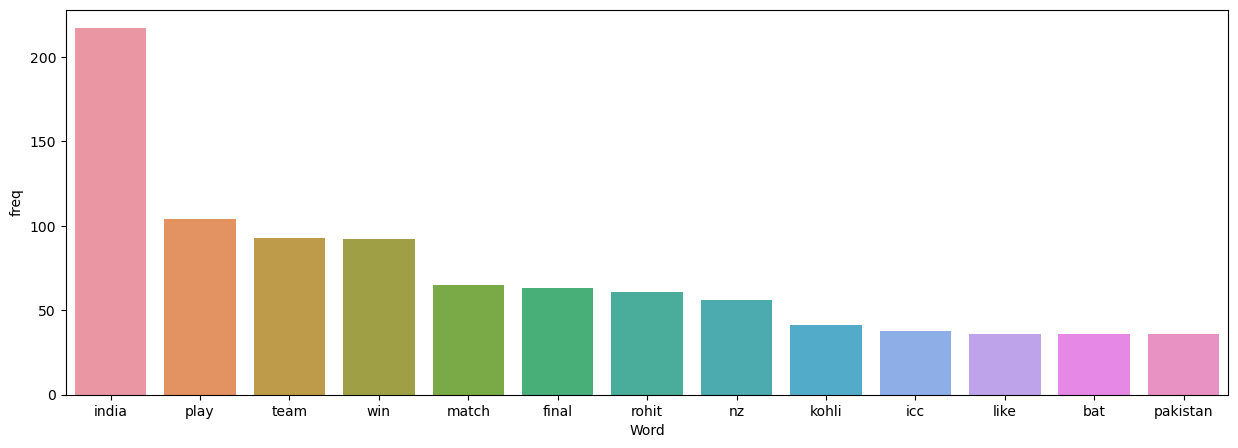

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))
fg = sns.barplot(x='Word', y='freq',data=w)

## Word CLoud

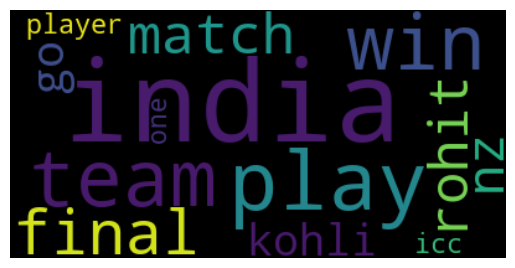

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# Generate a word cloud image
abc = WordCloud(stopwords=set(STOPWORDS),
                      background_color="black",
                      collocations=False,
                      mode="RGBA",  # r = red , g = green , b = blue
                      max_words=13).generate(' '.join(data.simpleText))
# Display the generated image:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

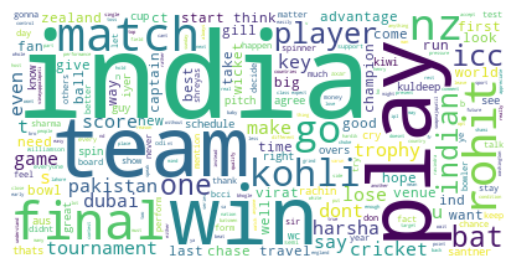

In [44]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      mode="RGBA",
                      max_words=15224).generate(' '.join(data.simpleText))
# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [45]:
from textblob import TextBlob

In [53]:
data['polarity'] = data['simpleText'].apply(lambda x: TextBlob(x).sentiment.polarity) # polarity range -1 to +1
data.head(5)

,simpleText,polarity,Sentiment
0,thats difference kohli everybody else kohli fo...,0.078571,0.078571
1,ohoooin bgt toovirat performance unnoticedwhol...,0.300000,0.300000
2,​ swapnajapatil bro choose violence 😂😂 🤣,0.000000,0.000000
3,agree,0.000000,0.000000
4,couldnt agree,0.000000,0.000000


In [54]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,simpleText,polarity,Sentiment
0,thats difference kohli everybody else kohli fo...,0.078571,Positive
1,ohoooin bgt toovirat performance unnoticedwhol...,0.300000,Positive
2,​ swapnajapatil bro choose violence 😂😂 🤣,0.000000,Positive
3,agree,0.000000,Positive
4,couldnt agree,0.000000,Positive


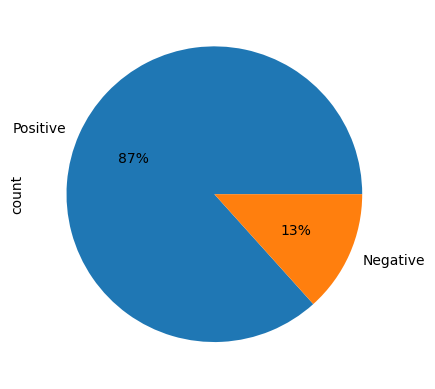

In [55]:
data.Sentiment.value_counts().plot.pie(autopct="%0.0f%%");

## Sentiment Analysis

In [60]:
from textblob import TextBlob

In [61]:
data['polarity'] = data['simpleText'].apply(lambda x: TextBlob(x).sentiment.polarity) # polarity range -1 to +1

In [62]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')

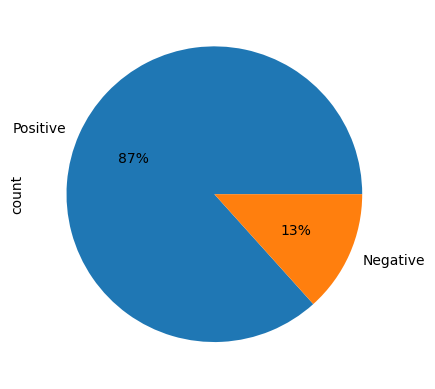

In [63]:
data.Sentiment.value_counts().plot.pie(autopct="%0.0f%%");